# Keras 패키지를 사용한 신경망 구현

Keras 패키지는 theano 또는 tensorflow 를 계산 엔진으로 사용할 수 있는 파이썬 패키지다. 신경망을 구성하기 위한 각 구성요소를 클래스로 제공하기 때문에 이를 간단히 연결하기만 하면 신경망을 구현할 수 있다.

## 샘플 데이터

Keras 는 다음과 같은 샘플 데이터를 가지고 있다. 이 데이터는 처음 사용할 때 인터넷에서 다운로드 한다.

* CIFAR10 이미지
  * 10 종류의 카테고리 라벨을 가지는 50,000 개의 32x32 해상도 컬러 트레이닝 이미지와 10,000 개의 테스트 이미지

* IMDB 영화 감상
  * positive/negative 라벨을 가지는 25,000 영화 감상 데이터
  * 텍스트 단어는 숫자로 인코딩되어 있음

* 로이터 뉴스 토픽 
  * 46 종류의 토픽 라벨을 가지는 11,228 개의 로이터 뉴스 텍스트
  * 텍스트 단어는 숫자로 인코딩되어 있음

* MNIST 숫자 이미지
  * 0부터 9까지의 숫자에 대한 28x28 단색 이미지
  * 트레이딩 데이터 60,000개. 테스트 이미지 10,000개

* Boston housing price
  * 보스턴 주택 가격 데이터

여기에서는 MNIST 데이터를 사용하여 신경망을 구현하는 예를 보인다. 신경망의 구조는 다음 그림과 같다.

<img src="https://datascienceschool.net/upfiles/90f2752671424cef846839b89ddcf6aa.png">

In [1]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


In [75]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)


(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


데이터를 float 타입으로 바꾸고 스케일링한다.

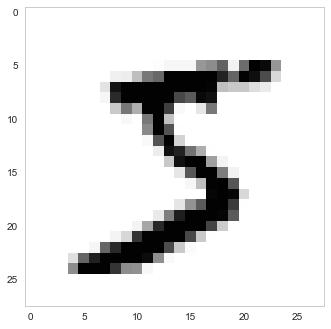

In [64]:
plt.imshow(X_train0[0])
plt.grid(False)
plt.show()

In [65]:
X_train0[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [76]:
X_train0.astype('float32')/255.0

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 

In [40]:
X_train = X_train0.reshape(60000, 784).astype('float32')/255.0
X_test = X_test0.reshape(10000, 784).astype('float32')/255.0
print(X_train.shape, X_train.dtype) ## 28*28 = 784로 변경 

(60000, 784) float32


y 데이터는 One-Hot-Encoding 을 한다.

In [73]:
y_train0[:10]
#y_train0.shape =(60000,)

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [42]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5] ## 가로축으로 처음 row는 5를 나타냄 
## 두번째 row는 0
## 세번째 row는 4 나타냄

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

## 신경망 구현 순서

Keras 를 사용하면 다음과 같은 순서로 신경망을 구성할 수 있다.

1. ``Sequential`` 모형 클래스 객체 생성
1. ``add`` 메서드로 layer 추가. 
   * ``Dense`` layer 가 가장 일반적인 신경망
   * 입력단부터 순차적으로 추가한다.
   * 레이어는 출력 뉴런 갯수를 첫번째 인수로 받는다.
   * 최초의 레이어는 ``input_dim`` 인수로 입력 크기를 설정해야 한다.
   * ``activation`` 인수로 activation 함수 설정
1. ``compile`` 메서드로 모형 완성. 
   * ``loss``인수로 Loss 함수 설정
   * ``optimizer`` 인수로 최적화 알고리즘 설정
   * ``metrics`` 인수로 트레이닝 단계에서 기록할 성능 기준 설정
1. ``fit`` 메서드로 트레이닝
   * ``nb_epoch`` 로 epoch 횟수 설정
   * ``batch_size`` 로 mini batch size 설정
   * ``metrics`` 인수로 설정한 성능 기준 기록을 출력으로 반환 
   * Ju[yter Notebook을 사용할 때는 ``verbose=2``로 설정하여 progress bar 가 나오지 않도록 설정한다.

In [43]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential() ## 구조를 나타냄 , 구조를 어떻게 만드는지 나옴 
model.add(Dense(15, input_dim=784, activation="sigmoid")) ## 15개 hidden layer,784 레이어, sigmoid는 로지스틱을 이야기함   
model.add(Dense(10, activation="sigmoid"))## hidden layer 10개로 셋팅
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"]) 
## IR - running rate 스텝사이즈, loss = 줄이고자 하는 것 RSS, metircs = 모니터링기준, accracy를 모니터링 하겠다 

In [44]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

만들어진 모형은 ``model_to_dot`` 명령으로 그래프 형태를 보거나 모델 내부의 ``layers`` 리스트를 살펴봄으로써 내부 구조를 확인할 수 있다.

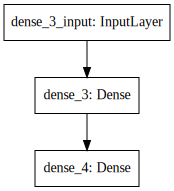

In [45]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [46]:
model.layers

In [47]:
l1 = model.layers[0]
l2 = model.layers[1]

In [48]:
l1.name

'dense_3'

In [49]:
l1.input_shape ## 데이터가 몇개 들어올지 모름

(None, 784)

In [50]:
l1.output_shape 

(None, 15)

In [51]:
l1.activation

<function keras.activations.sigmoid>

In [52]:
l2.name

'dense_4'

In [53]:
l2.input_shape

(None, 15)

In [54]:
l2.output_shape

(None, 10)

In [55]:
l2.activation

<function keras.activations.sigmoid>

``fit`` 메서드로 트레이닝을 할 수 있다.

In [57]:
%%time
hist = model.fit(X_train, Y_train, nb_epoch=30, batch_size=100, validation_data=(X_test, Y_test), verbose=2) 
## test 에대한 val_cross 의 accruacy점수가 높음 ## epoch가높아질수록 accuracy 높아지는 현상을 볼수 있다 

C:\Users\User\Anaconda3\lib\site-packages\keras\models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 0.1019 - acc: 0.2440 - val_loss: 0.0864 - val_acc: 0.3213
Epoch 2/30
 - 1s - loss: 0.0845 - acc: 0.3921 - val_loss: 0.0821 - val_acc: 0.4409
Epoch 3/30
 - 1s - loss: 0.0796 - acc: 0.4997 - val_loss: 0.0765 - val_acc: 0.5340
Epoch 4/30
 - 1s - loss: 0.0740 - acc: 0.5620 - val_loss: 0.0707 - val_acc: 0.5852
Epoch 5/30
 - 1s - loss: 0.0682 - acc: 0.6149 - val_loss: 0.0649 - val_acc: 0.6522
Epoch 6/30
 - 1s - loss: 0.0625 - acc: 0.6759 - val_loss: 0.0594 - val_acc: 0.6998
Epoch 7/30
 - 1s - loss: 0.0576 - acc: 0.7101 - val_loss: 0.0551 - val_acc: 0.7316
Epoch 8/30
 - 1s - loss: 0.0537 - acc: 0.7325 - val_loss: 0.0516 - val_acc: 0.7485
Epoch 9/30
 - 1s - loss: 0.0505 - acc: 0.7474 - val_loss: 0.0486 - val_acc: 0.7639
Epoch 10/30
 - 1s - loss: 0.0478 - acc: 0.7608 - val_loss: 0.0461 - val_acc: 0.7759
Epoch 11/30
 - 1s - loss: 0.0455 - acc: 0.7739 - val_loss: 0.0439 - val_acc: 0.7893
Epoch 12/30
 - 1s - loss: 0.0435 - 

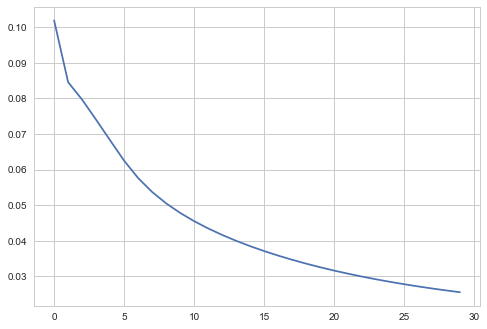

In [58]:
plt.plot(hist.history['loss'])
plt.show() ## 중간기록들 (loss fuction)

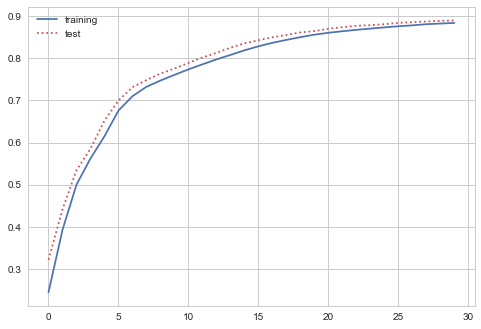

In [59]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show() ## 최종적으로 신경망의 training accuracy Vs. Test Accuracy 비교: 성능측정의 척도가 된다 

## 모형의 사용

트레이닝이 끝난 모형은 ``predict`` 메서드로 y 값을 출력하거나 출력된 y값을 각 클래스에 대한 판별함수로 가정하고 ``predict_classes`` 메서드로 classification을 할 수 있다.

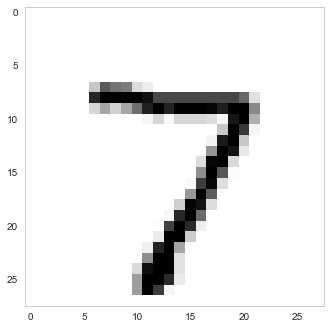

In [31]:
plt.imshow(X_test0[0, :])
plt.grid(False)
plt.show()

In [13]:
model.predict(X_test[:1, :])

array([[ 0.04662439,  0.01898405,  0.0253421 ,  0.03961192,  0.00993867,
         0.01506678,  0.00471446,  0.93260151,  0.00493476,  0.11073165]], dtype=float32)

In [14]:
model.predict_classes(X_test[:1, :], verbose=0)

array([7])

## 모형의 저장

트레이닝이 끝난 모형은 ``save`` 메서드로 가중치와 함께 hdf5 형식으로 저장하였다가 나중에 ``load`` 명령으로 불러 사용할 수 있다.

In [33]:
model.save('my_model.hdf5')
del model

In [34]:
from keras.models import load_model

model2 = load_model('my_model.hdf5')
model2.predict_classes(X_test[:1, :], verbose=0)

array([4], dtype=int64)

theono CUDA, GPU사용하여 Graph
Keras는 tensorflow를 백엔드로 가짐

tehsorflow= theono까지 비슷하나 여러가지 컴퓨터에서 동시에 돌릴수 있다 